In [1]:
import os
from pathlib import Path
import glob
import shutil

In [2]:
!ls ~/workspace/Fish/

'Black Sea Sprat'  'Red Mullet'      Shrimp		   Trout
'Gilt-Head Bream'  'Red Sea Bream'  'Striped Red Mullet'   validation
'Hourse Mackerel'  'Sea Bass'	     train


In [3]:
import tensorflow as tf

2023-08-04 14:04:51.502596: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
tf.__version__

'2.9.1'

In [5]:

!rm -rf ~/workspace/Fish/train
!rm -rf ~/workspace/Fish/validation

## Root Folders

In [6]:
folders = "/home/jovyan/workspace/Fish/"
folder_list= os.listdir("/home/jovyan/workspace/Fish")

In [7]:
folder_list

['Gilt-Head Bream',
 'Striped Red Mullet',
 'Red Mullet',
 'Shrimp',
 'Black Sea Sprat',
 'Trout',
 'Red Sea Bream',
 'Sea Bass',
 'Hourse Mackerel']

### Count of pictures

In [8]:
for folder in folder_list:
    print(len(glob.glob1(folders+folder,"*.png")))

1000
1000
1000
1000
1000
1000
1000
1000
1000


### Train Validation partitions

In [9]:
TRAIN_DIR = f"{folders}train"
VAL_DIR = f"{folders}validation"

In [10]:
train_dir = os.path.join(folders, "train")
os.makedirs(train_dir, exist_ok=True)
val_dir = os.path.join(folders, "validation")
os.makedirs(val_dir, exist_ok=True)

In [11]:
for folder in folder_list:
    folder = os.path.join(TRAIN_DIR, folder)
    os.makedirs(folder, exist_ok=True)

for folder in folder_list:
    folder = os.path.join(VAL_DIR, folder)
    os.makedirs(folder, exist_ok=True)


In [12]:
for folder in folder_list:
    pngs = [f for f in os.listdir(folders+folder) if '.png' in f.lower()]
    i = 1
    dest_path= TRAIN_DIR
    for png in pngs:
        source = f"{folders}{folder}/{png}"
        #print(source)
        dest = f"{dest_path}/{folder}/{png}"
        #print(dest)
        if i == 700:
            dest_path = VAL_DIR
        shutil.copy(source, dest)
        i+=1

### Size of train pictures

In [13]:
for folder in folder_list:
    print(len(os.listdir(f"{TRAIN_DIR}/{folder}")))

700
700
700
700
700
700
700
700
700


### Size of validation pictures

In [14]:
for folder in folder_list:
    print(len(os.listdir(f"{VAL_DIR}/{folder}")))

300
300
300
300
300
300
300
300
300


In [15]:
import matplotlib.pyplot as plt
import PIL


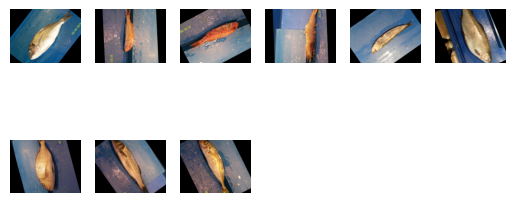

In [16]:

files=[]
rows = 3
for folder in folder_list:
    img = os.path.join(f"{train_dir}/{folder}/00001.png")
    files.append(img)

for num, x in enumerate(files):
    img = PIL.Image.open(x)
    plt.subplot(rows,6,num+1)
    plt.axis('off')
    plt.imshow(img)

### Model

#### Learning Rate

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as c




## Without Data augmentation

In [18]:
validation_datagen = ImageDataGenerator(
rescale = 1./255)

training_datagen = ImageDataGenerator(
rescale = 1./255)


train_generator = training_datagen.flow_from_directory(
TRAIN_DIR,
target_size=(249,249),
class_mode="categorical",
batch_size=128,
shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
VAL_DIR,
target_size=(249,249),
class_mode="categorical",
batch_size=128,
shuffle=True
)

Found 6300 images belonging to 9 classes.
Found 2700 images belonging to 9 classes.


In [19]:
import scipy

In [20]:
def make_model(lr):
  model = tf.keras.models.Sequential([
      #First Conv layer
      tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(249,249,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      # Second Conv layer
      tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      #Flatten
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(9, activation="softmax")
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

0.0001


2023-08-04 14:05:03.484797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-04 14:05:03.490303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-04 14:05:03.490544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-04 14:05:03.491120: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Epoch 1/35


2023-08-04 14:05:07.862487: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-08-04 14:05:08.735737: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-04 14:05:08.736608: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-04 14:05:08.736641: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-08-04 14:05:08.737586: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-04 14:05:08.737671: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


20/20 [==============================] - 35s 2s/step - loss: 2.1250 - accuracy: 0.2051 - val_loss: 1.8932 - val_accuracy: 0.4187
Epoch 2/35
20/20 [==============================] - 29s 1s/step - loss: 1.7137 - accuracy: 0.4402 - val_loss: 1.5782 - val_accuracy: 0.4266
Epoch 3/35
20/20 [==============================] - 30s 1s/step - loss: 1.3938 - accuracy: 0.5699 - val_loss: 1.2482 - val_accuracy: 0.6016
Epoch 4/35
20/20 [==============================] - 30s 1s/step - loss: 1.1257 - accuracy: 0.6609 - val_loss: 1.0433 - val_accuracy: 0.6859
Epoch 5/35
20/20 [==============================] - 30s 1s/step - loss: 0.9401 - accuracy: 0.7203 - val_loss: 0.9118 - val_accuracy: 0.7047
Epoch 6/35
20/20 [==============================] - 29s 1s/step - loss: 0.8143 - accuracy: 0.7423 - val_loss: 0.6849 - val_accuracy: 0.8188
Epoch 7/35
20/20 [==============================] - 29s 1s/step - loss: 0.6598 - accuracy: 0.8106 - val_loss: 0.6493 - val_accuracy: 0.7969
Epoch 8/35
20/20 [=============

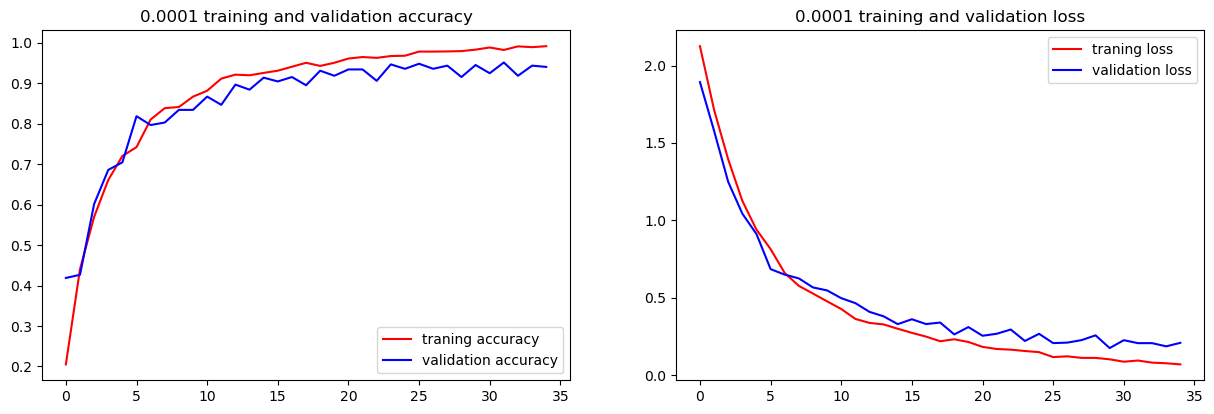


0.001
Epoch 1/35
20/20 [==============================] - 32s 2s/step - loss: 2.6879 - accuracy: 0.3516 - val_loss: 1.2023 - val_accuracy: 0.5328
Epoch 2/35
20/20 [==============================] - 29s 1s/step - loss: 0.6502 - accuracy: 0.7882 - val_loss: 0.4883 - val_accuracy: 0.8266
Epoch 3/35
20/20 [==============================] - 30s 2s/step - loss: 0.2667 - accuracy: 0.9129 - val_loss: 0.2166 - val_accuracy: 0.9312
Epoch 4/35
20/20 [==============================] - 30s 2s/step - loss: 0.1257 - accuracy: 0.9664 - val_loss: 0.2267 - val_accuracy: 0.9203
Epoch 5/35
20/20 [==============================] - 30s 2s/step - loss: 0.0783 - accuracy: 0.9785 - val_loss: 0.1549 - val_accuracy: 0.9359
Epoch 6/35
20/20 [==============================] - 30s 2s/step - loss: 0.0470 - accuracy: 0.9879 - val_loss: 0.1284 - val_accuracy: 0.9578
Epoch 7/35
20/20 [==============================] - 30s 2s/step - loss: 0.0332 - accuracy: 0.9906 - val_loss: 0.1604 - val_accuracy: 0.9563
Epoch 8/35
20

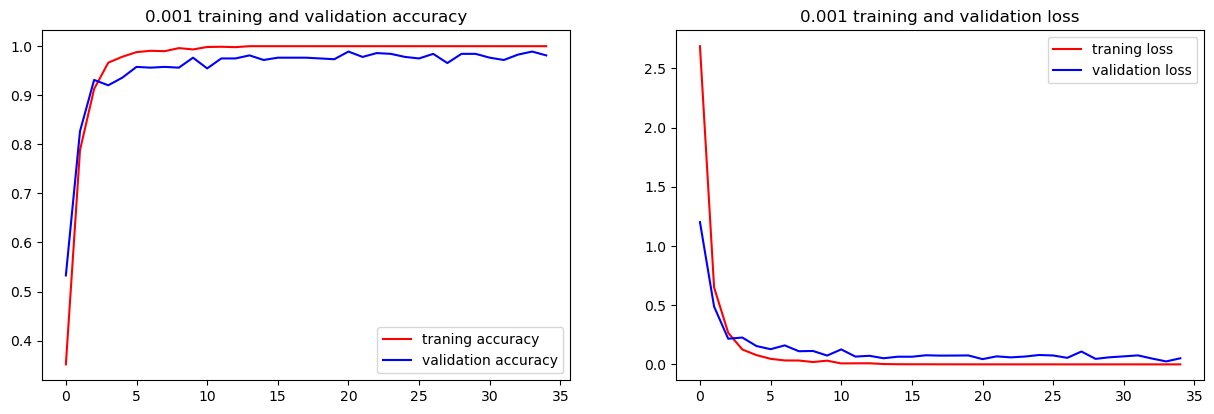

In [21]:
scores = {}
for lr in [0.0001, 0.001]:
  print(lr)
  c.clear_session()
  model = make_model(lr=lr)
  history = model.fit(train_generator, epochs=35, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=5)
  scores[lr] = history.history
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(len(acc))
  plt.figure(figsize=(15,10))
  plt.subplot(2, 2, 1)
  plt.plot(epochs, acc, "r", label="traning accuracy")
  plt.plot(epochs, val_acc, "b", label="validation accuracy")
  plt.title(f"{lr} training and validation accuracy")
  plt.legend(loc=0)
  plt.subplot(2, 2, 2)
  plt.plot(epochs, loss, "r", label="traning loss")
  plt.plot(epochs, val_loss, "b", label="validation loss")
  plt.title(f"{lr} training and validation loss")
  plt.legend(loc=0)
  plt.show()

  print()

## Evaluate

In [22]:
TEST_DIR = "/home/jovyan/workspace/NA_Fish_Dataset"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
  TEST_DIR,
  target_size=(249,249),
  class_mode="categorical",
  batch_size=128)
model.evaluate(test_generator)

Found 431 images belonging to 9 classes.
4/4 [==============================] - 20s 5s/step - loss: 5.8369 - accuracy: 0.3573


[5.836904048919678, 0.35730859637260437]

## Without Dropout And  with ImageDataGenerator

In [23]:
validation_datagen = ImageDataGenerator(
rescale = 1./255)

training_datagen = ImageDataGenerator(
rescale = 1./255,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
channel_shift_range=0.2,
fill_mode="reflect")


train_generator = training_datagen.flow_from_directory(
TRAIN_DIR,
target_size=(249,249),
class_mode="categorical",
batch_size=128,
shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
VAL_DIR,
target_size=(249,249),
class_mode="categorical",
batch_size=128,
shuffle=True
)

Found 6300 images belonging to 9 classes.
Found 2700 images belonging to 9 classes.


In [24]:
def make_model(lr):
  model = tf.keras.models.Sequential([
      #First Conv layer
      tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(249,249,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      # Second Conv layer
      tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      #Flatten
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(9, activation="softmax")
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

In [25]:
!pip install scipy

0.0001
Epoch 1/35
20/20 [==============================] - 58s 3s/step - loss: 2.1613 - accuracy: 0.1756 - val_loss: 1.9713 - val_accuracy: 0.2188
Epoch 2/35
20/20 [==============================] - 59s 3s/step - loss: 1.8804 - accuracy: 0.3172 - val_loss: 1.6585 - val_accuracy: 0.4000
Epoch 3/35
20/20 [==============================] - 59s 3s/step - loss: 1.6976 - accuracy: 0.3750 - val_loss: 1.5310 - val_accuracy: 0.4203
Epoch 4/35
20/20 [==============================] - 59s 3s/step - loss: 1.5571 - accuracy: 0.4238 - val_loss: 1.3934 - val_accuracy: 0.5297
Epoch 5/35
20/20 [==============================] - 57s 3s/step - loss: 1.4545 - accuracy: 0.4902 - val_loss: 1.2635 - val_accuracy: 0.5484
Epoch 6/35
20/20 [==============================] - 57s 3s/step - loss: 1.4274 - accuracy: 0.4915 - val_loss: 1.2432 - val_accuracy: 0.5781
Epoch 7/35
20/20 [==============================] - 59s 3s/step - loss: 1.3899 - accuracy: 0.5035 - val_loss: 1.1610 - val_accuracy: 0.5984
Epoch 8/35
20

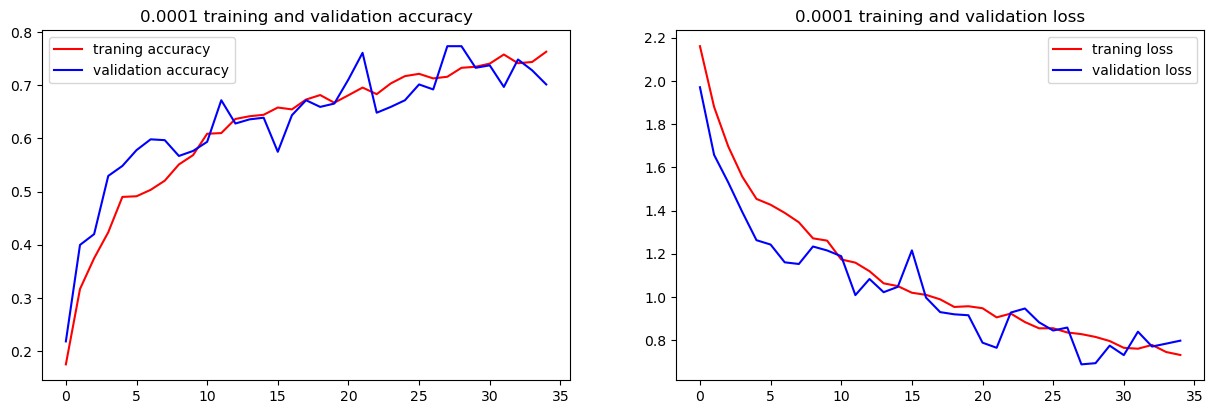


0.001
Epoch 1/35
20/20 [==============================] - 61s 3s/step - loss: 3.7127 - accuracy: 0.1336 - val_loss: 2.1473 - val_accuracy: 0.1000
Epoch 2/35
20/20 [==============================] - 57s 3s/step - loss: 2.0795 - accuracy: 0.1667 - val_loss: 1.9034 - val_accuracy: 0.2297
Epoch 3/35
20/20 [==============================] - 59s 3s/step - loss: 1.8672 - accuracy: 0.2969 - val_loss: 1.6972 - val_accuracy: 0.4203
Epoch 4/35
20/20 [==============================] - 57s 3s/step - loss: 1.6495 - accuracy: 0.4110 - val_loss: 1.3439 - val_accuracy: 0.5250
Epoch 5/35
20/20 [==============================] - 59s 3s/step - loss: 1.4301 - accuracy: 0.4863 - val_loss: 1.0707 - val_accuracy: 0.6156
Epoch 6/35
20/20 [==============================] - 57s 3s/step - loss: 1.2289 - accuracy: 0.5695 - val_loss: 0.9164 - val_accuracy: 0.6859
Epoch 7/35
20/20 [==============================] - 57s 3s/step - loss: 1.0960 - accuracy: 0.6016 - val_loss: 0.8514 - val_accuracy: 0.7016
Epoch 8/35
20

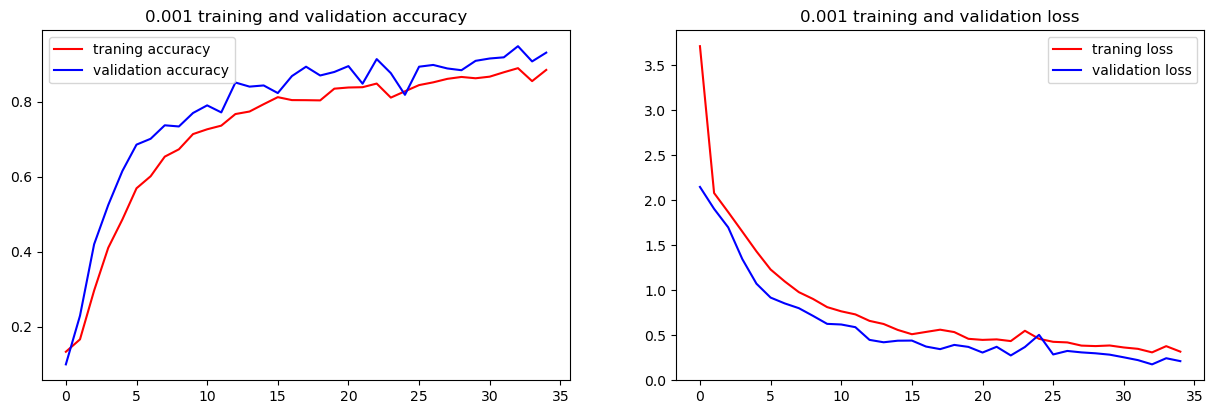

In [26]:
scores = {}
for lr in [0.0001, 0.001]:
  print(lr)
  c.clear_session()
  model = make_model(lr=lr)
  history = model.fit(train_generator, epochs=35, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=5)
  scores[lr] = history.history
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(len(acc))
  plt.figure(figsize=(15,10))
  plt.subplot(2, 2, 1)
  plt.plot(epochs, acc, "r", label="traning accuracy")
  plt.plot(epochs, val_acc, "b", label="validation accuracy")
  plt.title(f"{lr} training and validation accuracy")
  plt.legend(loc=0)
  plt.subplot(2, 2, 2)
  plt.plot(epochs, loss, "r", label="traning loss")
  plt.plot(epochs, val_loss, "b", label="validation loss")
  plt.title(f"{lr} training and validation loss")
  plt.legend(loc=0)
  plt.show()

  print()




In [27]:
import numpy as np

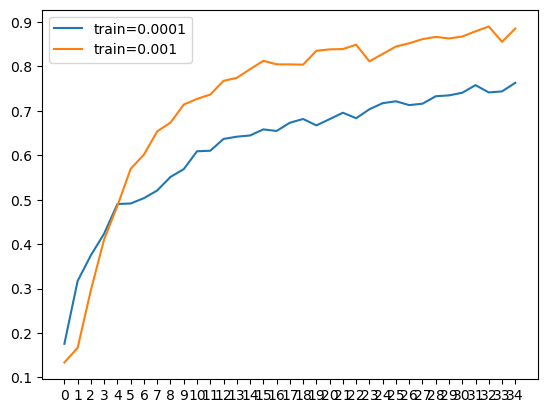

In [28]:


for lr, hist in scores.items():
        plt.plot(hist['accuracy'], label=('train=%s' % lr))
plt.xticks(np.arange(len(acc)))
plt.legend()




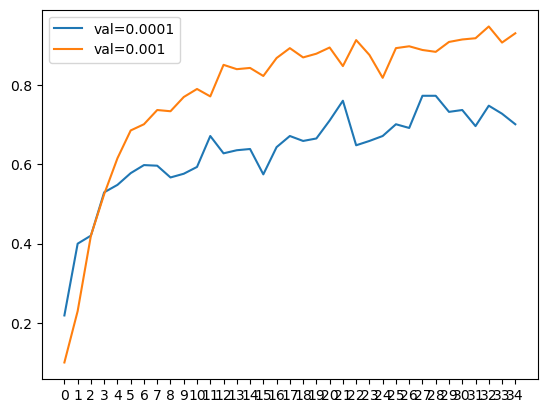

In [29]:
for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
  plt.xticks(np.arange(len(acc)))
plt.legend()
plt.show()

## Evaluate

In [30]:
TEST_DIR = "/home/jovyan/workspace/NA_Fish_Dataset"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
  TEST_DIR,
  target_size=(249,249),
  class_mode="categorical",
  batch_size=128)
model.evaluate(test_generator)

Found 431 images belonging to 9 classes.
4/4 [==============================] - 19s 5s/step - loss: 0.8711 - accuracy: 0.7007


[0.8711451292037964, 0.7006960511207581]

## With Dropout And ImageDataGenerator

#### Inner Size

In [31]:
LEARNING_RATE = 0.001

### With Dropout and ImageDataGenerator

In [32]:
def make_model(lr, dropout):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(249,249, 3) ),
        tf.keras.layers.MaxPool2D(pool_size = (2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(9, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

0.1
Epoch 1/35
20/20 [==============================] - 57s 3s/step - loss: 2.2065 - accuracy: 0.1195 - val_loss: 2.1747 - val_accuracy: 0.1156
Epoch 2/35
20/20 [==============================] - 56s 3s/step - loss: 2.0947 - accuracy: 0.1846 - val_loss: 1.8840 - val_accuracy: 0.2625
Epoch 3/35
20/20 [==============================] - 57s 3s/step - loss: 1.9637 - accuracy: 0.2148 - val_loss: 1.8375 - val_accuracy: 0.2781
Epoch 4/35
20/20 [==============================] - 55s 3s/step - loss: 1.9040 - accuracy: 0.2528 - val_loss: 1.6794 - val_accuracy: 0.3766
Epoch 5/35
20/20 [==============================] - 58s 3s/step - loss: 1.7588 - accuracy: 0.3180 - val_loss: 1.5166 - val_accuracy: 0.4516
Epoch 6/35
20/20 [==============================] - 57s 3s/step - loss: 1.5471 - accuracy: 0.4133 - val_loss: 1.1194 - val_accuracy: 0.6016
Epoch 7/35
20/20 [==============================] - 57s 3s/step - loss: 1.4093 - accuracy: 0.4652 - val_loss: 1.2305 - val_accuracy: 0.5141
Epoch 8/35
20/20

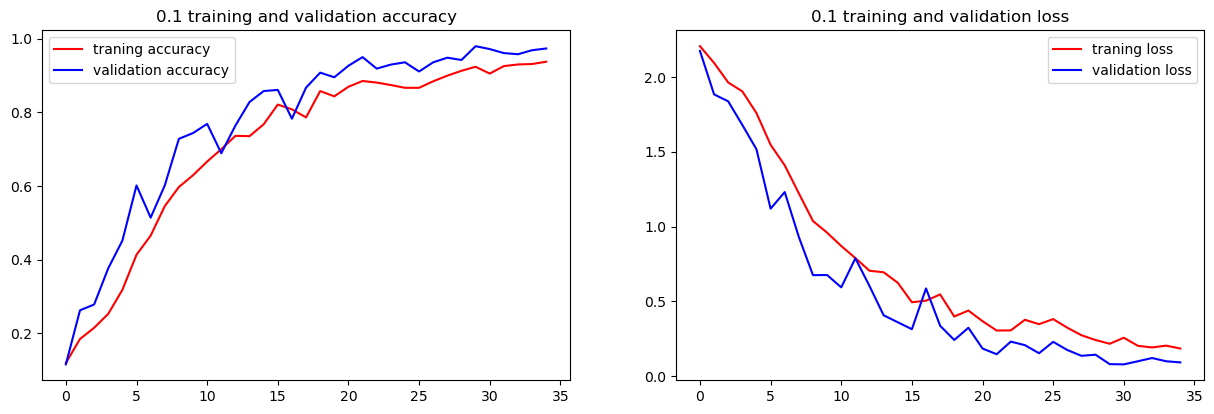

0.2
Epoch 1/35
20/20 [==============================] - 58s 3s/step - loss: 2.1800 - accuracy: 0.1473 - val_loss: 2.0808 - val_accuracy: 0.1875
Epoch 2/35
20/20 [==============================] - 57s 3s/step - loss: 2.0088 - accuracy: 0.2219 - val_loss: 1.8696 - val_accuracy: 0.2750
Epoch 3/35
20/20 [==============================] - 56s 3s/step - loss: 1.8782 - accuracy: 0.2744 - val_loss: 1.7470 - val_accuracy: 0.3734
Epoch 4/35
20/20 [==============================] - 59s 3s/step - loss: 1.6236 - accuracy: 0.3777 - val_loss: 1.3852 - val_accuracy: 0.4656
Epoch 5/35
20/20 [==============================] - 58s 3s/step - loss: 1.4462 - accuracy: 0.4354 - val_loss: 1.2431 - val_accuracy: 0.5437
Epoch 6/35
20/20 [==============================] - 61s 3s/step - loss: 1.3318 - accuracy: 0.4824 - val_loss: 1.0807 - val_accuracy: 0.5859
Epoch 7/35
20/20 [==============================] - 55s 3s/step - loss: 1.2368 - accuracy: 0.5240 - val_loss: 1.0416 - val_accuracy: 0.5922
Epoch 8/35
20/20

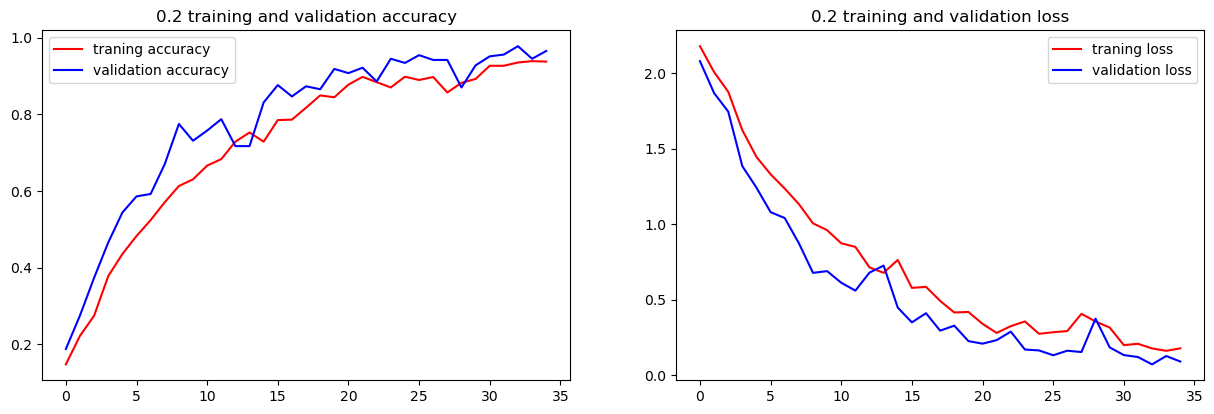

0.5
Epoch 1/35
20/20 [==============================] - 59s 3s/step - loss: 2.2157 - accuracy: 0.1113 - val_loss: 2.1952 - val_accuracy: 0.1344
Epoch 2/35
20/20 [==============================] - 55s 3s/step - loss: 2.1911 - accuracy: 0.1122 - val_loss: 2.1435 - val_accuracy: 0.2266
Epoch 3/35
20/20 [==============================] - 55s 3s/step - loss: 2.1377 - accuracy: 0.1537 - val_loss: 2.0627 - val_accuracy: 0.2297
Epoch 4/35
20/20 [==============================] - 58s 3s/step - loss: 2.1077 - accuracy: 0.1734 - val_loss: 1.9714 - val_accuracy: 0.2078
Epoch 5/35
20/20 [==============================] - 58s 3s/step - loss: 1.9908 - accuracy: 0.2164 - val_loss: 1.8598 - val_accuracy: 0.2641
Epoch 6/35
20/20 [==============================] - 60s 3s/step - loss: 1.8899 - accuracy: 0.2504 - val_loss: 1.7671 - val_accuracy: 0.2844
Epoch 7/35
20/20 [==============================] - 60s 3s/step - loss: 1.8180 - accuracy: 0.2797 - val_loss: 1.4753 - val_accuracy: 0.4375
Epoch 8/35
20/20

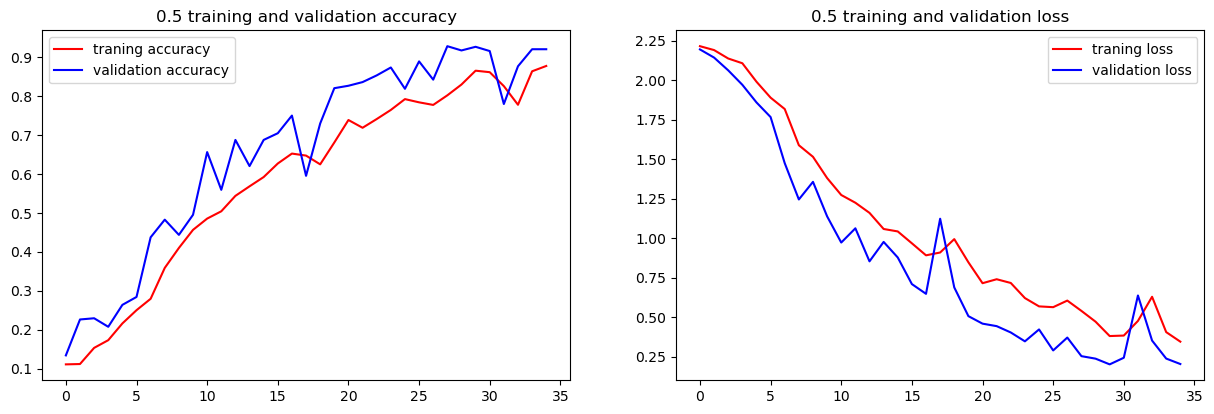

In [34]:
scores = {}
for drop in [0.1, 0.2, 0.5]:
  print(drop)
  c.clear_session()
  model= make_model(lr=LEARNING_RATE, dropout=drop)
  history = model.fit(train_generator, epochs=35, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=5)
  scores[drop] = history.history
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(len(acc))
  plt.figure(figsize=(15,10))
  plt.subplot(2, 2, 1)
  plt.plot(epochs, acc, "r", label="traning accuracy")
  plt.plot(epochs, val_acc, "b", label="validation accuracy")
  plt.title(f"{drop} training and validation accuracy")
  plt.legend(loc=0)
  plt.subplot(2, 2, 2)
  plt.plot(epochs, loss, "r", label="traning loss")
  plt.plot(epochs, val_loss, "b", label="validation loss")
  plt.title(f"{drop} training and validation loss")
  plt.legend(loc=0)
  plt.show()


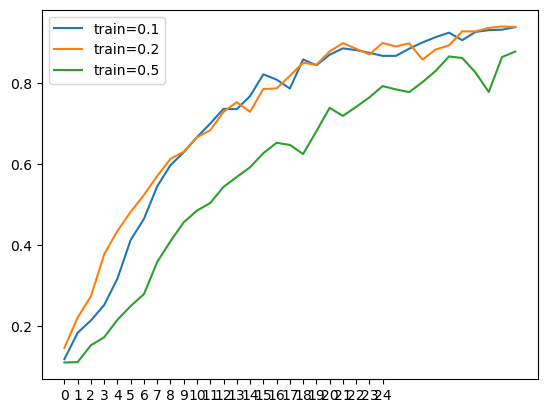

In [37]:
for drop, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % drop))
    plt.xticks(np.arange(25))
plt.legend(loc=0)
plt.show()

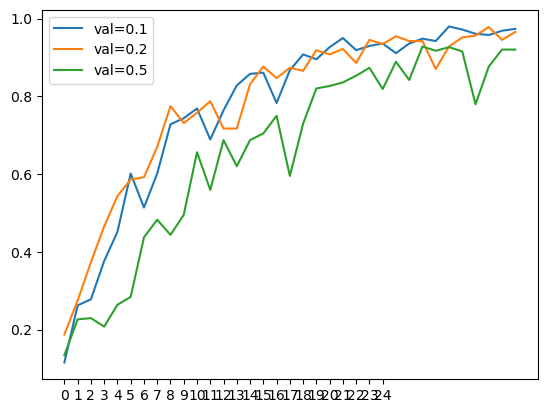

In [36]:
for drop, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
  plt.xticks(np.arange(25))
plt.legend(loc=0)
plt.show()

In [38]:
drop = 0.2
LEARNING_RATE = 0.001

In [39]:
def make_model(lr, dropout):
  model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(249,249, 3)),
  tf.keras.layers.MaxPool2D(pool_size = (2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size = (2,2)),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size = (2,2)),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size = (2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(dropout),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(dropout),
  tf.keras.layers.Dense(9, activation='softmax')
  ])
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])

  log_dir="/home/jovyan/workspace/logs/fit"
  callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=0,
  write_graph=True,
  write_images=False,
  write_steps_per_second=False,
  update_freq='epoch',
  profile_batch=0,
  embeddings_freq=0,
  embeddings_metadata=None,)
  path_checkpoint = f"/home/jovyan/workspace/model_checkpoint{dropout}.h5"
  modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
  monitor="val_accuracy",
  filepath=path_checkpoint,
  verbose=1,
  save_weights_only=False,
  save_best_only=True,)



  return model, callback, modelckpt_callback

Epoch 1/35
20/20 [==============================] - ETA: 0s - loss: 2.1904 - accuracy: 0.1266
Epoch 1: val_accuracy improved from -inf to 0.18594, saving model to /home/jovyan/workspace/model_checkpoint0.2.h5
20/20 [==============================] - 60s 3s/step - loss: 2.1904 - accuracy: 0.1266 - val_loss: 2.1027 - val_accuracy: 0.1859
Epoch 2/35
20/20 [==============================] - ETA: 0s - loss: 2.0700 - accuracy: 0.1931
Epoch 2: val_accuracy improved from 0.18594 to 0.23125, saving model to /home/jovyan/workspace/model_checkpoint0.2.h5
20/20 [==============================] - 56s 3s/step - loss: 2.0700 - accuracy: 0.1931 - val_loss: 1.9511 - val_accuracy: 0.2313
Epoch 3/35
20/20 [==============================] - ETA: 0s - loss: 1.9209 - accuracy: 0.2320
Epoch 3: val_accuracy improved from 0.23125 to 0.29063, saving model to /home/jovyan/workspace/model_checkpoint0.2.h5
20/20 [==============================] - 58s 3s/step - loss: 1.9209 - accuracy: 0.2320 - val_loss: 1.7310 - v

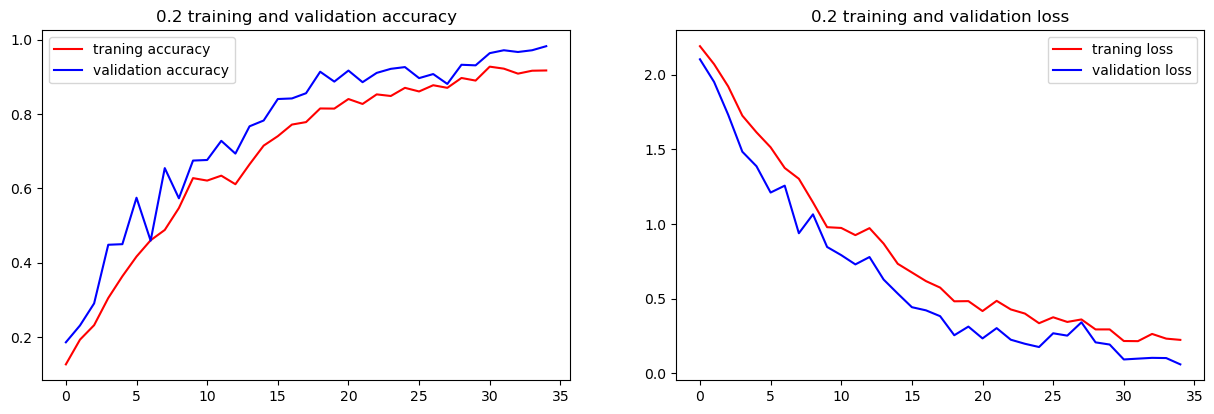

In [40]:
scores={}
c.clear_session()
model, callback, modelckpt_callback = make_model(lr=LEARNING_RATE, dropout=drop)
history = model.fit(train_generator, epochs=35, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=5, callbacks=[callback, modelckpt_callback])
scores[drop] = history.history
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(epochs, acc, "r", label="traning accuracy")
plt.plot(epochs, val_acc, "b", label="validation accuracy")
plt.title(f"{drop} training and validation accuracy")
plt.legend(loc=0)
plt.subplot(2, 2, 2)
plt.plot(epochs, loss, "r", label="traning loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title(f"{drop} training and validation loss")
plt.legend(loc=0)
plt.show()



In [41]:
!ls ~/workspace/NA_Fish_Dataset

'Black Sea Sprat'  'Red Mullet'      Shrimp
'Gilt Head Bream'  'Red Sea Bream'  'Striped Red Mullet'
'Horse Mackerel'   'Sea Bass'	     Trout


In [43]:
from huggingface_hub import push_to_hub_keras
from huggingface_hub import login
login()

In [44]:
push_to_hub_keras(model,
  "yusyel/fishv2",
  include_optimizer = True,
  tags = ["fish"],
log_dir = "/home/jovyan/workspace/logs/fit",

)

INFO:tensorflow:Assets written to: /tmp/tmp6e54v_1w/yusyel/fishv2/assets


INFO:tensorflow:Assets written to: /tmp/tmp6e54v_1w/yusyel/fishv2/assets


Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

saved_model.pb:   0%|          | 0.00/253k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/137M [00:00<?, ?B/s]

events.out.tfevents.1691170563.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-bpfgc.10908.0.v2:   0%…

events.out.tfevents.1691170616.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-bpfgc.10908.1.v2:   0%…

'https://huggingface.co/yusyel/fishv2/tree/main/'

In [45]:
model.evaluate(validation_generator)

22/22 [==============================] - 25s 1s/step - loss: 0.0688 - accuracy: 0.9819


[0.0688030868768692, 0.9818518757820129]

In [46]:
train_generator.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [47]:
TEST_DIR = "/home/jovyan/workspace/NA_Fish_Dataset"
test_datagen = ImageDataGenerator(rescale = 1./255)

In [48]:
test_generator = test_datagen.flow_from_directory(
  TEST_DIR,
  target_size=(249,249),
  class_mode="categorical",
  batch_size=128)


Found 431 images belonging to 9 classes.


In [49]:
model.evaluate(test_generator)

4/4 [==============================] - 21s 5s/step - loss: 0.4543 - accuracy: 0.8608


[0.45428144931793213, 0.860788881778717]